In [154]:
NYC_Poverty <- read.csv("NYCgov_Poverty_Measure_Data__2018_.csv")

library(ggplot2)
library(broom)
library(dplyr)
library(stringr)
library(tidyverse)

In [155]:
head(NYC_Poverty)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,⋯,NYCgov_IncomeTax,NYCgov_Income,NYCgov_EITC,Off_Threshold,Off_Pov_Stat,NYCgov_Threshold,NYCgov_Pov_Stat,NYCgov_PovGapIndex,NYCgov_PovGap,X
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,1,95,95,31,1,0,1,0,22,⋯,33917.9858,81735.03,0,13064,2,16241.60,2,0,0,NA
2,1000033,1,53,53,29,5,0,1,0,20,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
3,1000033,2,61,53,30,5,1,1,0,21,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
4,1000058,1,152,152,68,1,0,1,0,12,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
5,1000058,2,144,152,71,1,1,1,0,16,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
6,1000058,3,110,152,6,1,10,3,3,3,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA


In [156]:
subset <- NYC_Poverty[, c("SERIALNO", "AGEP", "CIT", "SEX", "ESR", "LANX", "ENG", "MAR", "DIS", "TEN", 'FamType_PU', "WAGP_adj", "SSP_adj", "RNTP_adj", "Ethnicity", "Boro", "EducAttain", "FTPTWork", "Off_Pov_Stat", "NYCgov_Income", "NYCgov_Pov_Stat", "NYCgov_Childcare", "NYCgov_Commuting", "NYCgov_MOOP", "NYCgov_MedSpending", "NYCgov_MedPremiums", "NYCgov_HEAP", "NYCgov_SNAP", "NYCgov_SchoolLunch", "NYCgov_SchoolBreakfast", 'NYCgov_Nutrition',"NYCgov_FICAtax", "NYCgov_IncomeTax", "NYCgov_PovGap", "NYCgov_PovGapIndex")]

In [157]:
head(subset)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,31,1,2,1,2,NA,5,2,2,⋯,1560.00,0,0,0.0,0.00,0.00,9765.242,33917.9858,0,0
2,1000033,29,5,2,1,1,1,1,2,2,⋯,9648.00,0,0,0.0,0.00,0.00,7750.192,16621.7209,0,0
3,1000033,30,5,1,1,1,2,1,2,2,⋯,9648.00,0,0,0.0,0.00,0.00,7750.192,16621.7209,0,0
4,1000058,68,1,1,6,2,NA,1,1,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0
5,1000058,71,1,2,6,2,NA,1,2,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0
6,1000058,6,1,2,NA,2,NA,5,2,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0


In [158]:
subset$SEX <- recode(subset$SEX, '1'='Male', '2'='Female')

In [159]:
subset$CIT <- recode(subset$CIT, '1'='US citizen', '2'='US citizen', '3'='US citizen', '4'='US citizen', '5'='Non citizen')

In [160]:
subset = na.omit(subset) # the entire row which contains any NA is removed 
# 2/3 of ENG are missing data, so we need to decide if we want to include ENG as a var in our subset
head(subset)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1000033,29,Non citizen,Female,1,1,1,1,2,2,⋯,9648.00,0,0,0,0,0,7750.192,16621.72,0,0
3,1000033,30,Non citizen,Male,1,1,2,1,2,2,⋯,9648.00,0,0,0,0,0,7750.192,16621.72,0,0
11,1000297,47,US citizen,Female,1,1,1,1,2,1,⋯,5459.76,0,0,0,0,0,12787.817,32575.16,0,0
12,1000297,48,US citizen,Male,1,1,1,1,2,1,⋯,5459.76,0,0,0,0,0,12787.817,32575.16,0,0
15,1000313,30,Non citizen,Male,1,1,1,5,2,3,⋯,6208.96,0,0,0,0,0,12787.817,37878.22,0,0
16,1000313,26,US citizen,Female,1,1,2,5,2,3,⋯,6208.96,0,0,0,0,0,12787.817,37878.22,0,0


In [161]:
nrow(subset)

[1] 27040

In [162]:
eth.name = c('Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian',
             'Hispanic','Others')
subset$Ethnicity = factor(subset$Ethnicity,levels = 1:5,labels = eth.name)

In [163]:
subset$NYCgov_Pov_Stat <- recode(subset$NYCgov_Pov_Stat, '1'='In poverty','2'='Not in poverty')

Warning message:
“Removed 24353 rows containing non-finite values (stat_boxplot).”


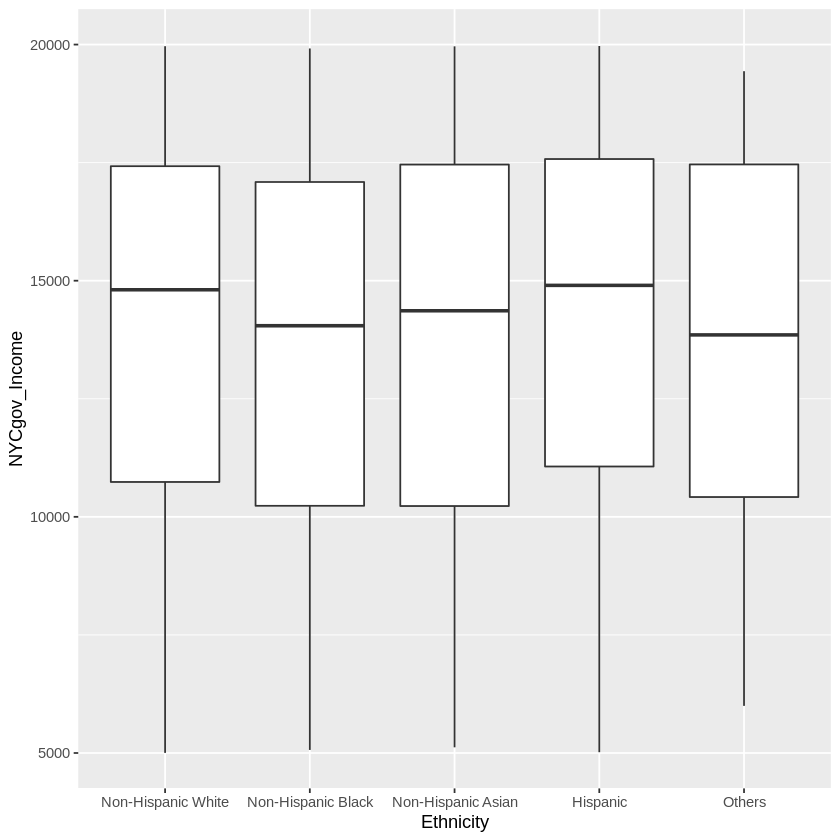

In [164]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_Income))+geom_boxplot()+ylim(5000, 20000)

In [165]:
opar = par(no.readonly =TRUE)
par(mar=c(5,1.8,0.3,1),pin=c(4.8,2.5))
Edu.name = c('less than HS','High School','Some College','Bachelors or higher')
subset$EducAttain = factor(subset$EducAttain,labels = Edu.name)
edu.t = prop.table(table(subset$Ethnicity,subset$EducAttain),1)
edu.t

                    
                     less than HS High School Some College Bachelors or higher
  Non-Hispanic White    0.1423879   0.2164559    0.1829529           0.4582033
  Non-Hispanic Black    0.1966006   0.2424929    0.2878187           0.2730878
  Non-Hispanic Asian    0.2473318   0.1882601    0.1701415           0.3942666
  Hispanic              0.3126758   0.2694543    0.2449841           0.1728858
  Others                0.1883117   0.1796537    0.1904762           0.4415584

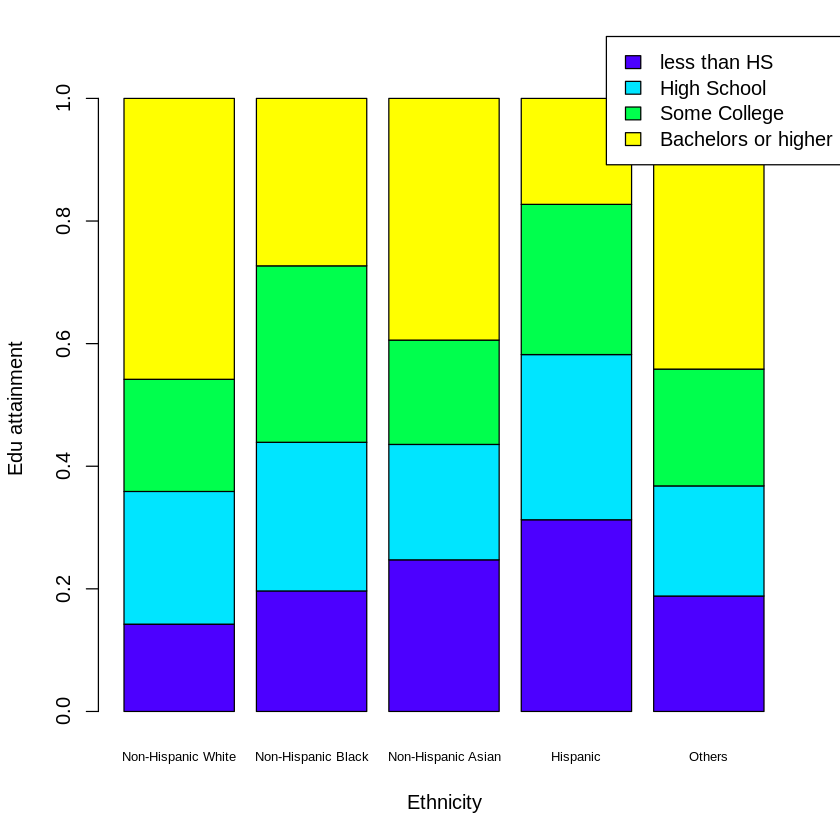

In [166]:
barplot(t(edu.t),col = topo.colors(4),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Edu attainment')
legend(x='topright',legend = rownames(t(edu.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

In [167]:
subset$Boro <- recode(subset$Boro, '1'='Bronx','2'='Brooklyn', '3'='Manhattan', '4'='Queens', '5'='Staten Island')
#subset$Boro

In [168]:
subset$LANX <- recode(subset$LANX, '1'='Speaks other language','2'='Speaks only English')
#subset$LANX

In [169]:
subset$ENG <- recode(subset$ENG, '1'='Very well','2'='Well', '3'='Not well', '4'='Not at all')
#subset$ENG

In [170]:
subset$MAR <- recode(subset$MAR, '1'='Married','2'='Widowed', '3'='Divorced', '4'='Separated', '5'='Never married or under 15')
#subset$MAR

In [171]:
subset$DIS <- recode(subset$DIS, '1'='Disability','2'='No disability')
#subset$DIS

In [172]:
subset$TEN <- recode(subset$TEN, '1'='Owned with mortgage or loan','2'='Owned free and clear', '3'='Rented', '4'='Occupied without payment of rent')

In [173]:
subset$FamType_PU <- recode(subset$FamType_PU, '1'='Husband/Wife+child ','2'='Husband/Wife no child ', '3'='Single Male+child', '4'='Single Female+child', '5'='Male unit head, no child','6'='Female unit head, no child','7'='Unrelated Indiv w/others','8'='Unrelated Indiv Alone')

In [174]:
subset$FTPTWork <- recode(subset$FTPTWork, '1'='Full Time Year Round','2'='Part time','3'='No work')

In [175]:
eng.t = prop.table(table(subset$Ethnicity,subset$ENG),1)
eng.t

                    
                     Not at all   Not well  Very well       Well
  Non-Hispanic White 0.02676958 0.12711447 0.61323698 0.23287896
  Non-Hispanic Black 0.02322946 0.10481586 0.64022663 0.23172805
  Non-Hispanic Asian 0.10039712 0.22238769 0.41077190 0.26644329
  Hispanic           0.09009938 0.19519970 0.51087568 0.20382524
  Others             0.05627706 0.14718615 0.56493506 0.23160173

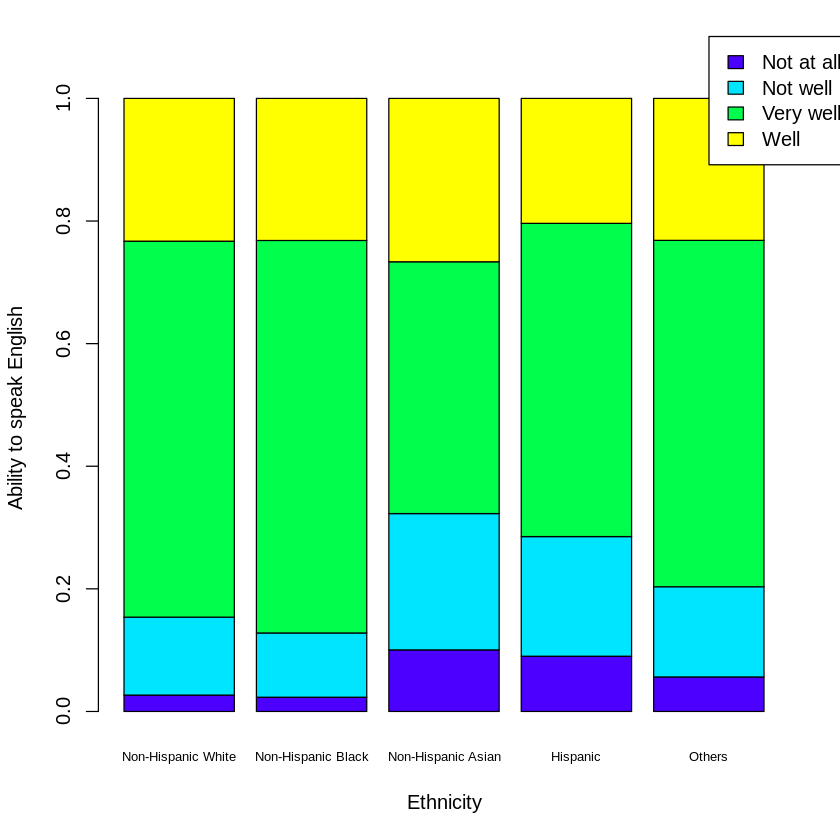

In [176]:
barplot(t(eng.t),col = topo.colors(4),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Ability to speak English')
legend(x='topright',legend = rownames(t(eng.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

In [177]:
dis.t = prop.table(table(subset$Ethnicity,subset$DIS),1)
dis.t

                    
                     Disability No disability
  Non-Hispanic White 0.13647561    0.86352439
  Non-Hispanic Black 0.10311615    0.89688385
  Non-Hispanic Asian 0.07694217    0.92305783
  Hispanic           0.14822801    0.85177199
  Others             0.09523810    0.90476190

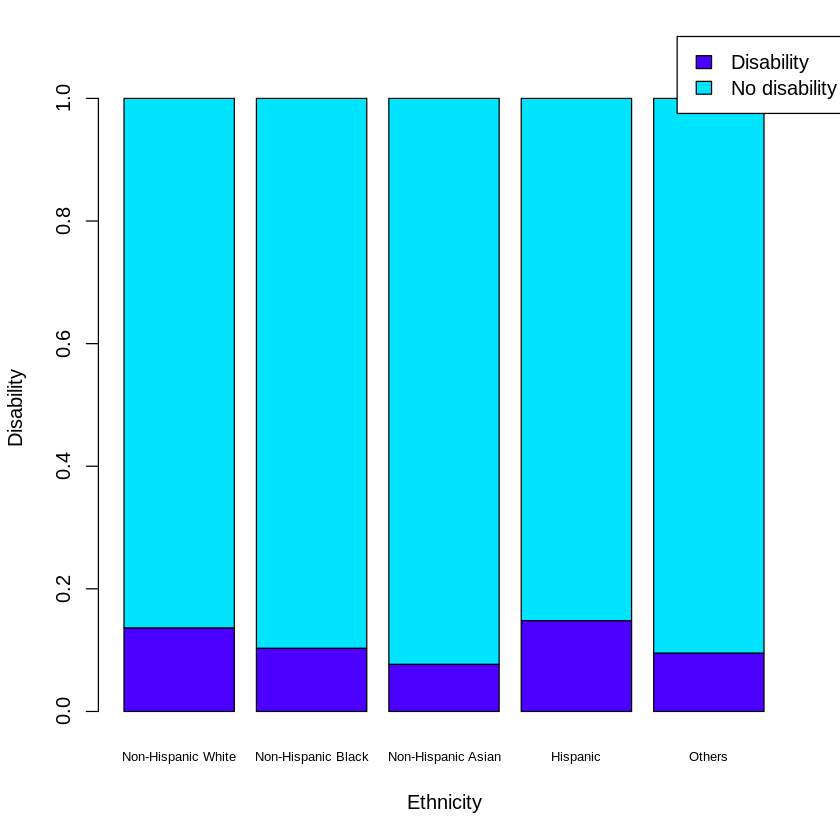

In [178]:
barplot(t(dis.t),col = topo.colors(2),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Disability')
legend(x='topright',legend = rownames(t(dis.t)),inset=-0.1,xpd=T,fill = topo.colors(2))

In [179]:
work.t=prop.table(table(subset$Ethnicity,subset$FTPTWork),1)
work.t

                    
                     Full Time Year Round   No work Part time
  Non-Hispanic White            0.4141895 0.3683692 0.2174413
  Non-Hispanic Black            0.4436261 0.3246459 0.2317280
  Non-Hispanic Asian            0.4048151 0.3488459 0.2463390
  Hispanic                      0.4115882 0.3765235 0.2118882
  Others                        0.4112554 0.3441558 0.2445887

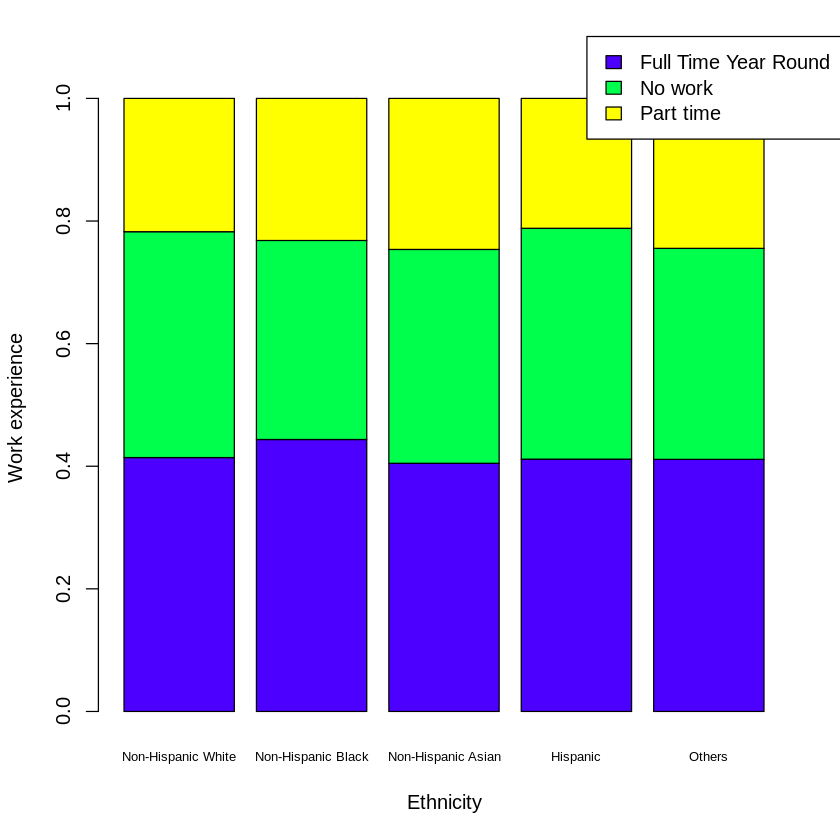

In [180]:
barplot(t(work.t),col = topo.colors(3),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Work experience')
legend(x='topright',legend = rownames(t(work.t)),inset=-0.1,xpd=T,fill = topo.colors(3))

Warning message:
“Removed 421 rows containing non-finite values (stat_boxplot).”


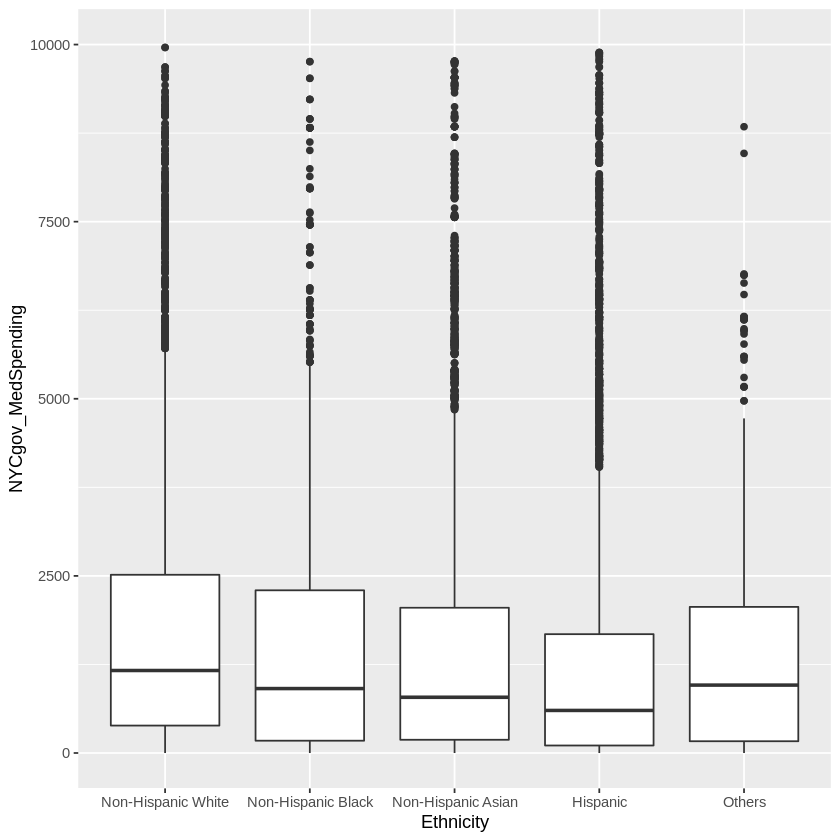

In [181]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_MedSpending))+geom_boxplot()+ylim(0, 10000)

Warning message:
“Removed 2228 rows containing non-finite values (stat_boxplot).”


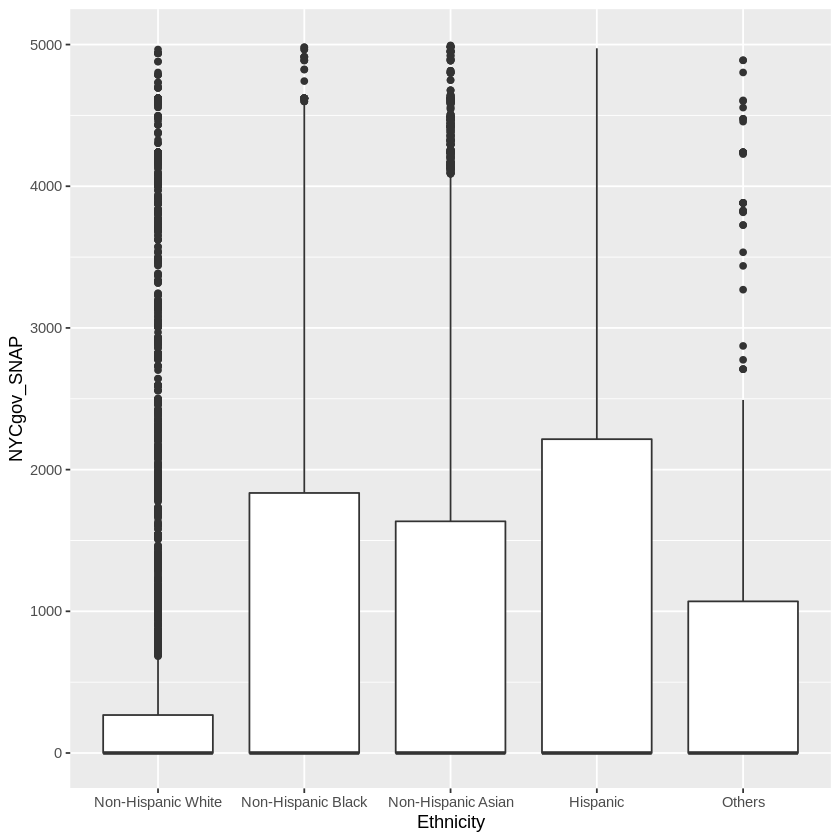

In [182]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_SNAP))+geom_boxplot()+ylim(0, 5000)

In [183]:
subset_asians <- subset %>%
    filter(Ethnicity == "Non-Hispanic Asian")
head(subset_asians)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000313,30,Non citizen,Male,1,Speaks other language,Very well,Never married or under 15,No disability,Rented,⋯,6208.96,0,0,0,0,0,12787.817,37878.217,0.00,0.0000000
2,1000313,26,US citizen,Female,1,Speaks other language,Well,Never married or under 15,No disability,Rented,⋯,6208.96,0,0,0,0,0,12787.817,37878.217,0.00,0.0000000
3,1000483,30,Non citizen,Male,6,Speaks other language,Very well,Married,No disability,Rented,⋯,0.00,0,1071,0,0,1071,0.000,0.000,19608.89,0.8562588
4,1000483,29,US citizen,Female,6,Speaks other language,Very well,Married,No disability,Rented,⋯,0.00,0,1071,0,0,1071,0.000,0.000,19608.89,0.8562588
5,1000635,65,Non citizen,Female,1,Speaks other language,Not at all,Married,No disability,Rented,⋯,897.00,0,2360,0,0,2360,2247.556,1170.443,0.00,0.0000000
6,1000635,67,Non citizen,Male,1,Speaks other language,Not at all,Married,No disability,Rented,⋯,897.00,0,2360,0,0,2360,2247.556,1170.443,0.00,0.0000000


Warning message:
“Removed 7769 rows containing missing values (geom_point).”


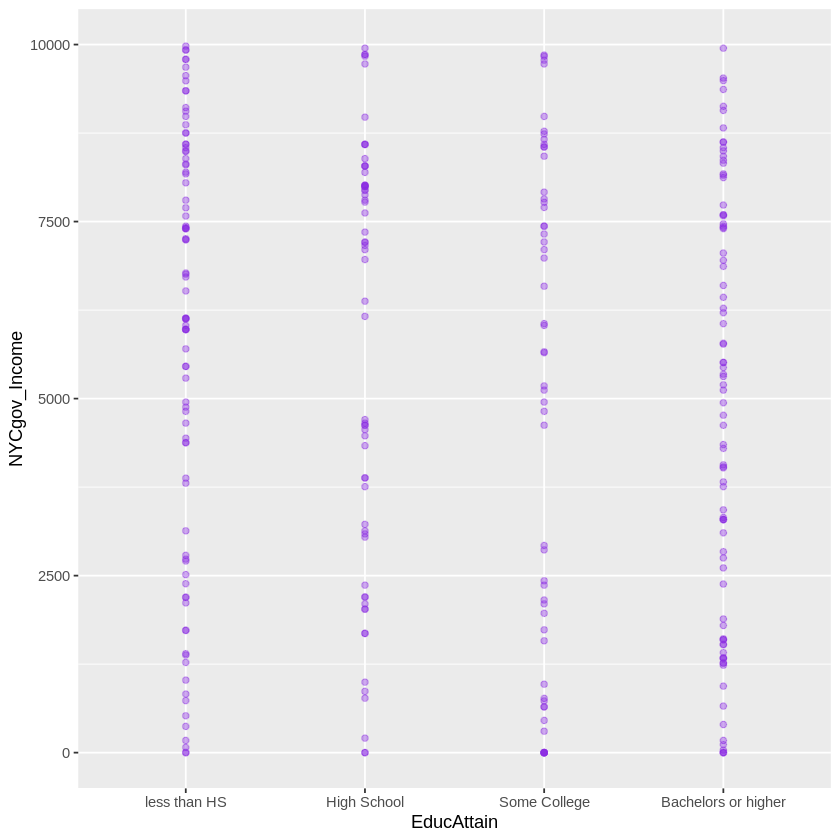

In [184]:
#plot the data

ggplot(subset_asians, aes(x = EducAttain, y = NYCgov_Income)) +
    geom_point(colour = "blueviolet", alpha = 0.4) +
    ylim(-5, 10000)

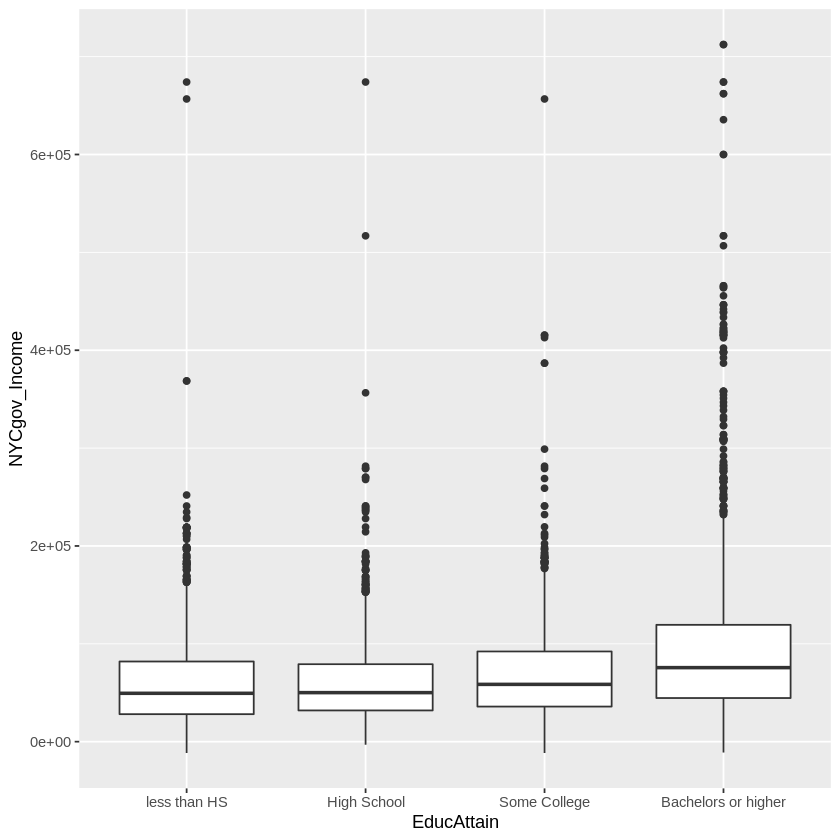

In [185]:
ggplot(subset_asians, aes(x = EducAttain, y = NYCgov_Income)) +
    geom_boxplot()

In [186]:
lr1 <- lm(NYCgov_Income ~ EducAttain, subset_asians)   # perform linear regression

summary(lr1)
tidy(lr1)


Call:
lm(formula = NYCgov_Income ~ EducAttain, data = subset_asians)

Residuals:
    Min      1Q  Median      3Q     Max 
-103274  -36775  -12607   22989  620171 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    60655.7     1364.5  44.454  < 2e-16 ***
EducAttainHigh School            760.6     2075.5   0.366    0.714    
EducAttainSome College          8553.5     2137.3   4.002 6.34e-05 ***
EducAttainBachelors or higher  31537.9     1740.6  18.119  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60910 on 8054 degrees of freedom
Multiple R-squared:  0.05306,	Adjusted R-squared:  0.0527 
F-statistic: 150.4 on 3 and 8054 DF,  p-value: < 2.2e-16


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),60655.672,1364.452,44.4542412,0.000000e+00
EducAttainHigh School,760.599,2075.482,0.3664686,7.140251e-01
EducAttainSome College,8553.479,2137.310,4.0019837,6.337670e-05
EducAttainBachelors or higher,31537.944,1740.584,18.1191780,5.962076e-72


In [187]:
mlr1 <- lm(NYCgov_Income ~ EducAttain+FTPTWork+Boro+CIT+ENG+SEX+MAR+DIS+TEN+FamType_PU+AGEP+NYCgov_MedSpending+NYCgov_SNAP+NYCgov_Nutrition+NYCgov_SchoolLunch+NYCgov_Childcare, subset_asians)
summary(mlr1)
tidy(mlr1)


Call:
lm(formula = NYCgov_Income ~ EducAttain + FTPTWork + Boro + CIT + 
    ENG + SEX + MAR + DIS + TEN + FamType_PU + AGEP + NYCgov_MedSpending + 
    NYCgov_SNAP + NYCgov_Nutrition + NYCgov_SchoolLunch + NYCgov_Childcare, 
    data = subset_asians)

Residuals:
    Min      1Q  Median      3Q     Max 
-160580  -30085   -7643   18467  594847 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         5.521e+04  8.004e+03   6.898 5.69e-12 ***
EducAttainHigh School              -3.489e+01  1.891e+03  -0.018 0.985280    
EducAttainSome College              3.707e+03  2.068e+03   1.793 0.073081 .  
EducAttainBachelors or higher       1.808e+04  1.912e+03   9.456  < 2e-16 ***
FTPTWorkNo work                    -2.468e+04  1.563e+03 -15.788  < 2e-16 ***
FTPTWorkPart time                  -1.935e+04  1.570e+03 -12.325  < 2e-16 ***
BoroBrooklyn                        7.155e+03  3.135e+03   2.282 0.022513 *  
BoroManhattan 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.521024e+04,8004.1292943,6.89772020,5.685692e-12
EducAttainHigh School,-3.489157e+01,1891.1547669,-0.01844988,9.852804e-01
EducAttainSome College,3.706700e+03,2067.8240721,1.79256081,7.308084e-02
EducAttainBachelors or higher,1.807827e+04,1911.8767492,9.45577067,4.128862e-21
FTPTWorkNo work,-2.468418e+04,1563.4914023,-15.78785635,2.552936e-55
FTPTWorkPart time,-1.935128e+04,1570.0569171,-12.32521020,1.360901e-34
BoroBrooklyn,7.154733e+03,3135.2386561,2.28203773,2.251318e-02
BoroManhattan,3.549981e+04,3578.2333119,9.92104434,4.577127e-23
BoroQueens,4.894404e+03,3068.1379837,1.59523605,1.106989e-01


In [188]:
mlr2 <- lm(NYCgov_Income ~ EducAttain+FTPTWork+Boro+ENG+SEX+MAR+DIS+TEN+FamType_PU+AGEP+NYCgov_MedSpending+NYCgov_Nutrition+NYCgov_Childcare, subset_asians)
summary(mlr2)
tidy(mlr2)


Call:
lm(formula = NYCgov_Income ~ EducAttain + FTPTWork + Boro + ENG + 
    SEX + MAR + DIS + TEN + FamType_PU + AGEP + NYCgov_MedSpending + 
    NYCgov_Nutrition + NYCgov_Childcare, data = subset_asians)

Residuals:
    Min      1Q  Median      3Q     Max 
-163058  -30189   -7651   18395  595228 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         5.490e+04  8.003e+03   6.860 7.42e-12 ***
EducAttainHigh School              -1.225e+02  1.892e+03  -0.065 0.948356    
EducAttainSome College              3.738e+03  2.067e+03   1.809 0.070548 .  
EducAttainBachelors or higher       1.812e+04  1.912e+03   9.475  < 2e-16 ***
FTPTWorkNo work                    -2.485e+04  1.562e+03 -15.913  < 2e-16 ***
FTPTWorkPart time                  -1.942e+04  1.569e+03 -12.382  < 2e-16 ***
BoroBrooklyn                        7.132e+03  3.134e+03   2.275 0.022911 *  
BoroManhattan                       3.555e+04  3.580e+03   9

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.489694e+04,8002.8802311,6.85964787,7.415467e-12
EducAttainHigh School,-1.225270e+02,1891.6395199,-0.06477293,9.483564e-01
EducAttainSome College,3.737931e+03,2066.7324572,1.80861878,7.054766e-02
EducAttainBachelors or higher,1.811758e+04,1912.2432670,9.47451623,3.457414e-21
FTPTWorkNo work,-2.485052e+04,1561.6819254,-15.91266492,3.718643e-56
FTPTWorkPart time,-1.942404e+04,1568.6727895,-12.38246933,6.765313e-35
BoroBrooklyn,7.131776e+03,3134.3579933,2.27535461,2.291092e-02
BoroManhattan,3.554666e+04,3579.5029756,9.93061450,4.162786e-23
BoroQueens,4.859312e+03,3068.8640636,1.58342374,1.133643e-01


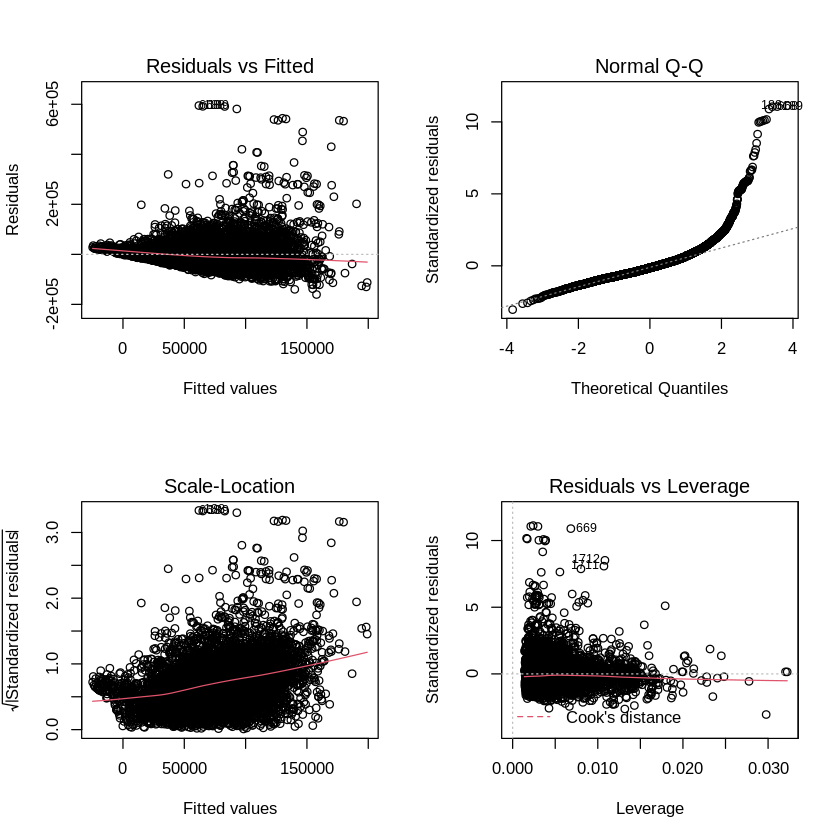

In [200]:
par(mfrow=c(2,2)) # to test normality of error term, heteroscedasticity
plot(mlr1)

In [201]:
glance(mlr1)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.2712493,0.2680697,53543.14,85.31084,0,35,-99153.23,198380.5,198639.3,2.299802e+13,8022,8058


In [202]:
mlr1_aug <- augment(mlr1)

head(mlr1_aug)

NYCgov_Income,EducAttain,FTPTWork,Boro,CIT,ENG,SEX,MAR,DIS,TEN,⋯,NYCgov_SNAP,NYCgov_Nutrition,NYCgov_SchoolLunch,NYCgov_Childcare,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
106862.111,Bachelors or higher,Full Time Year Round,Queens,Non citizen,Very well,Male,Never married or under 15,No disability,Rented,⋯,0,0,0,0,84818.72,22043.39,0.4121267,0.002098800,53545.91,9.922991e-06
106862.111,Bachelors or higher,Full Time Year Round,Queens,US citizen,Well,Female,Never married or under 15,No disability,Rented,⋯,0,0,0,0,75193.13,31668.98,0.5922412,0.002613749,53545.31,2.553261e-05
3291.767,Bachelors or higher,No work,Manhattan,Non citizen,Very well,Male,Married,No disability,Rented,⋯,1071,1071,0,0,84768.42,-81476.65,-1.5242005,0.003277081,53538.73,2.121751e-04
3291.767,Bachelors or higher,No work,Manhattan,US citizen,Very well,Female,Married,No disability,Rented,⋯,1071,1071,0,0,88242.75,-84950.98,-1.5888997,0.002906037,53538.05,2.043881e-04
25273.060,High School,Part time,Queens,Non citizen,Not at all,Female,Married,No disability,Rented,⋯,2360,2360,0,0,39587.27,-14314.21,-0.2677851,0.003324210,53546.24,6.643623e-06
25273.060,High School,Part time,Queens,Non citizen,Not at all,Male,Married,No disability,Rented,⋯,2360,2360,0,0,37143.03,-11869.97,-0.2220588,0.003321077,53546.32,4.564120e-06


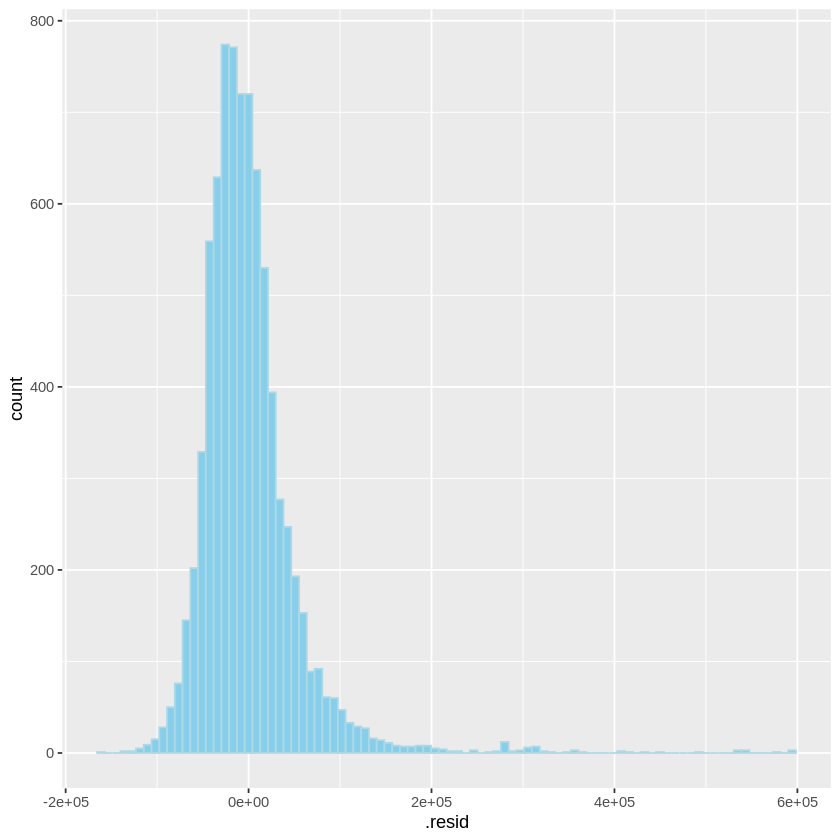

In [203]:
ggplot(mlr1_aug, aes(x = .resid)) +
    geom_histogram(colour = "lightblue", fill = "skyblue", bins = 90) # distribution of residuals

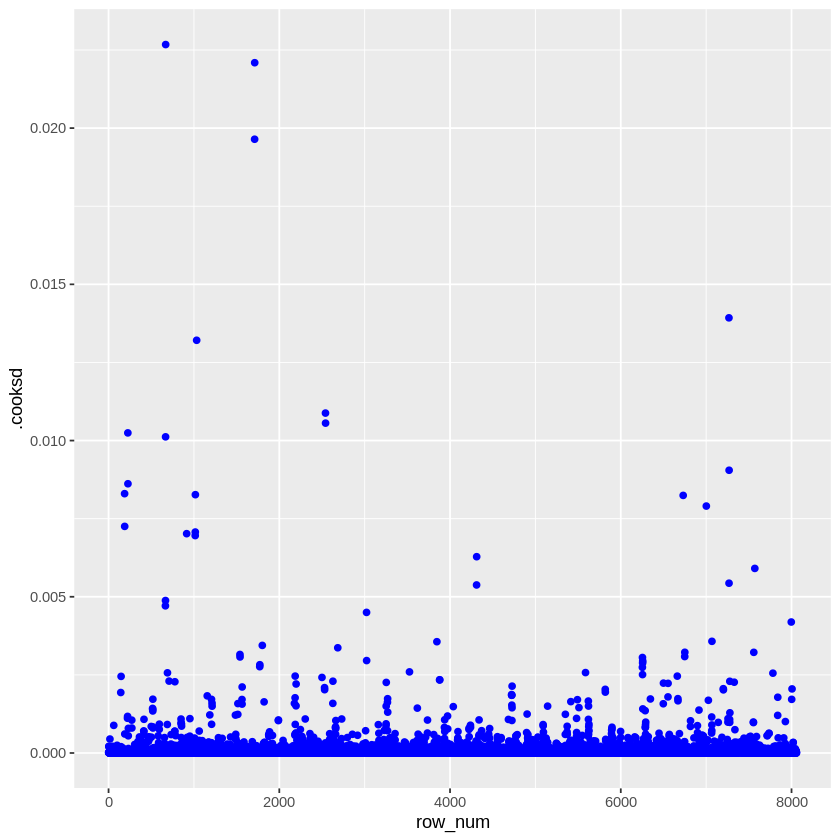

In [204]:
mlr1_aug$row_num <- 1:nrow(mlr1_aug)

ggplot(mlr1_aug, aes(x = row_num, y = .cooksd)) +
    geom_point(colour = "blue")

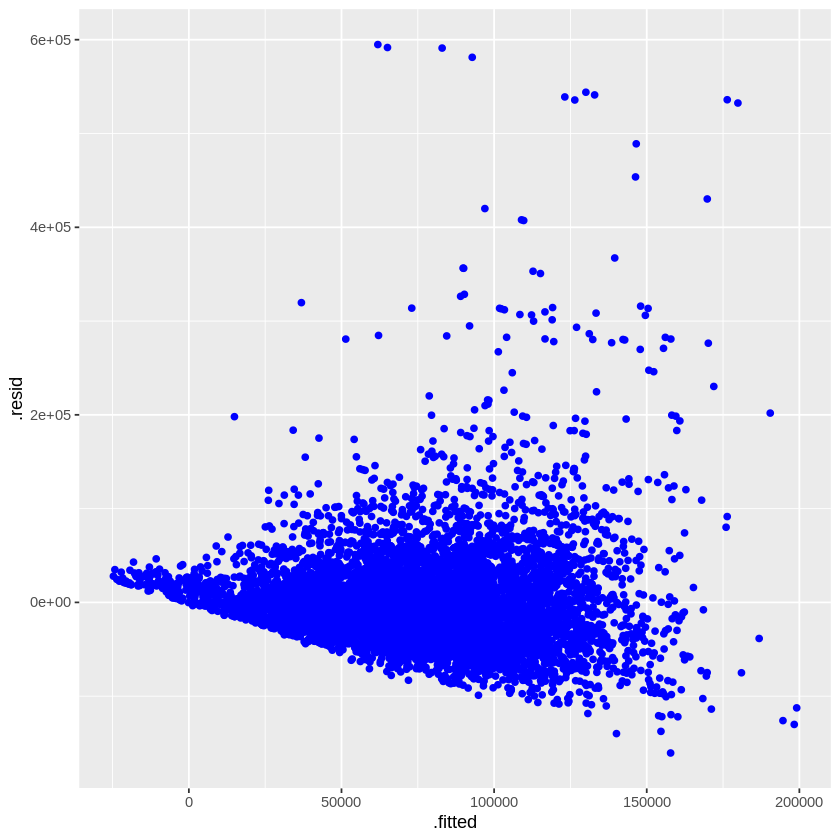

In [205]:
ggplot(mlr1_aug, aes(x = .fitted, y = .resid)) +
    geom_point(colour = "blue")

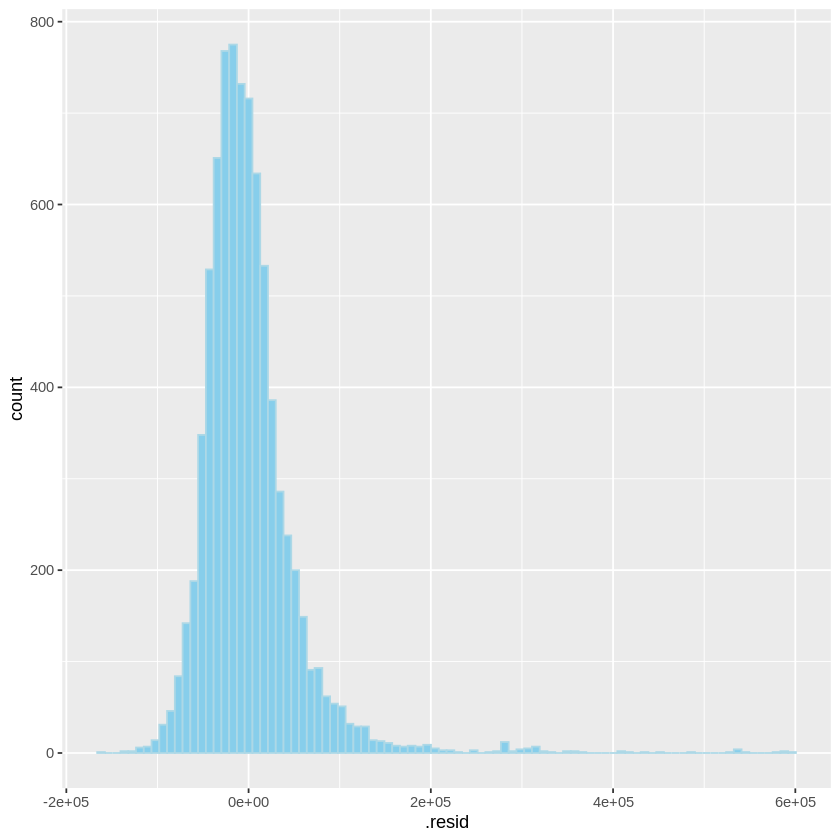

In [206]:
mlr2_aug <- augment(mlr2)
ggplot(mlr2_aug, aes(x = .resid)) +
    geom_histogram(colour = "lightblue", fill = "skyblue", bins = 90)

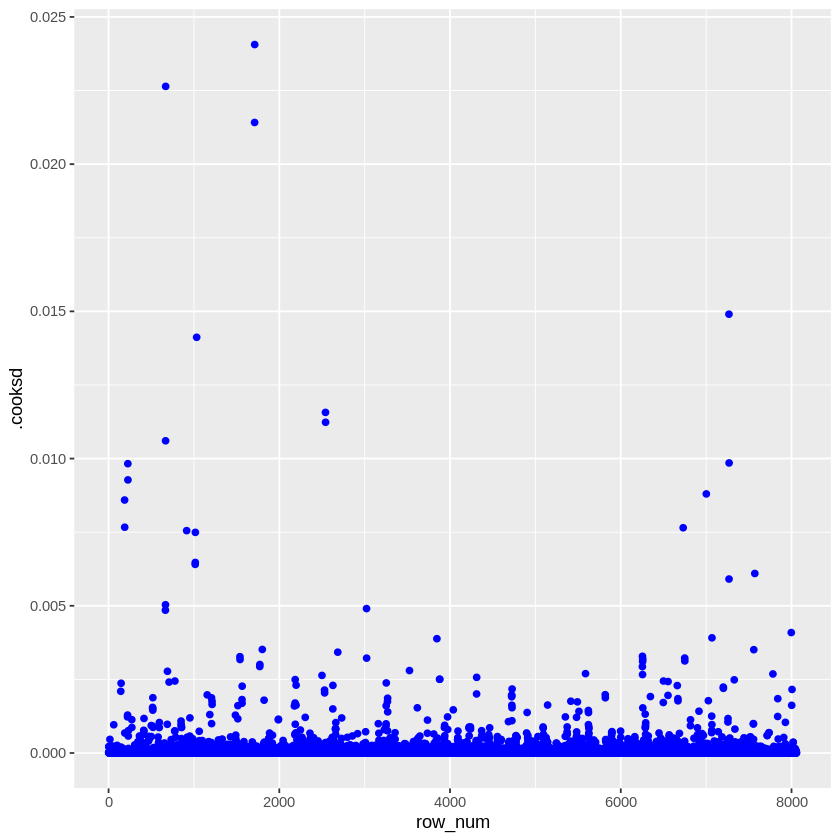

In [207]:
mlr2_aug$row_num <- 1:nrow(mlr2_aug)

ggplot(mlr2_aug, aes(x = row_num, y = .cooksd)) +
    geom_point(colour = "blue")

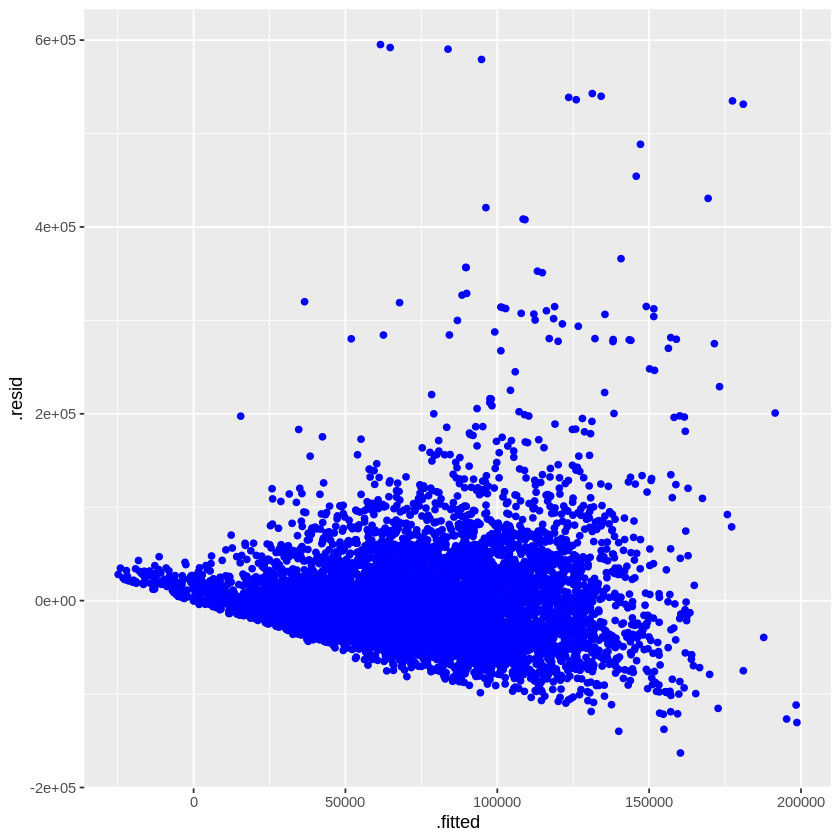

In [208]:
ggplot(mlr2_aug, aes(x = .fitted, y = .resid)) +
    geom_point(colour = "blue")

In [ ]:
# I asked Paul about how to test multicollinearity but I don't expect he'll respond in time
# do we want to add any interaction terms?
# we have all the codes we need for this project here, but feel free to explore